In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 94% 139M/149M [00:01<00:00, 152MB/s]
100% 149M/149M [00:01<00:00, 141MB/s]


In [3]:
def get_class_path(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it is a directory
    if os.path.isdir(label_path):
      # Iterate through the images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data
  df = pd.DataFrame({'Class': classes, 'Class Path': class_paths})

  return df

In [4]:
tr_df = get_class_path('/content/Training')

In [5]:
tr_df

,Class,Class Path
0,notumor,/content/Training/notumor/Tr-no_0794.jpg
1,notumor,/content/Training/notumor/Tr-no_1039.jpg
2,notumor,/content/Training/notumor/Tr-no_0972.jpg
3,notumor,/content/Training/notumor/Tr-no_0559.jpg
4,notumor,/content/Training/notumor/Tr-no_1252.jpg
...,...,...
5707,glioma,/content/Training/glioma/Tr-gl_0255.jpg
5708,glioma,/content/Training/glioma/Tr-gl_0182.jpg
5709,glioma,/content/Training/glioma/Tr-gl_0553.jpg
5710,glioma,/content/Training/glioma/Tr-gl_0380.jpg


In [6]:
ts_df = get_class_path('/content/Testing')

In [7]:
ts_df

,Class,Class Path
0,notumor,/content/Testing/notumor/Te-no_0097.jpg
1,notumor,/content/Testing/notumor/Te-no_0301.jpg
2,notumor,/content/Testing/notumor/Te-noTr_0000.jpg
3,notumor,/content/Testing/notumor/Te-no_0222.jpg
4,notumor,/content/Testing/notumor/Te-no_0139.jpg
...,...,...
1306,glioma,/content/Testing/glioma/Te-gl_0280.jpg
1307,glioma,/content/Testing/glioma/Te-gl_0163.jpg
1308,glioma,/content/Testing/glioma/Te-gl_0194.jpg
1309,glioma,/content/Testing/glioma/Te-gl_0146.jpg


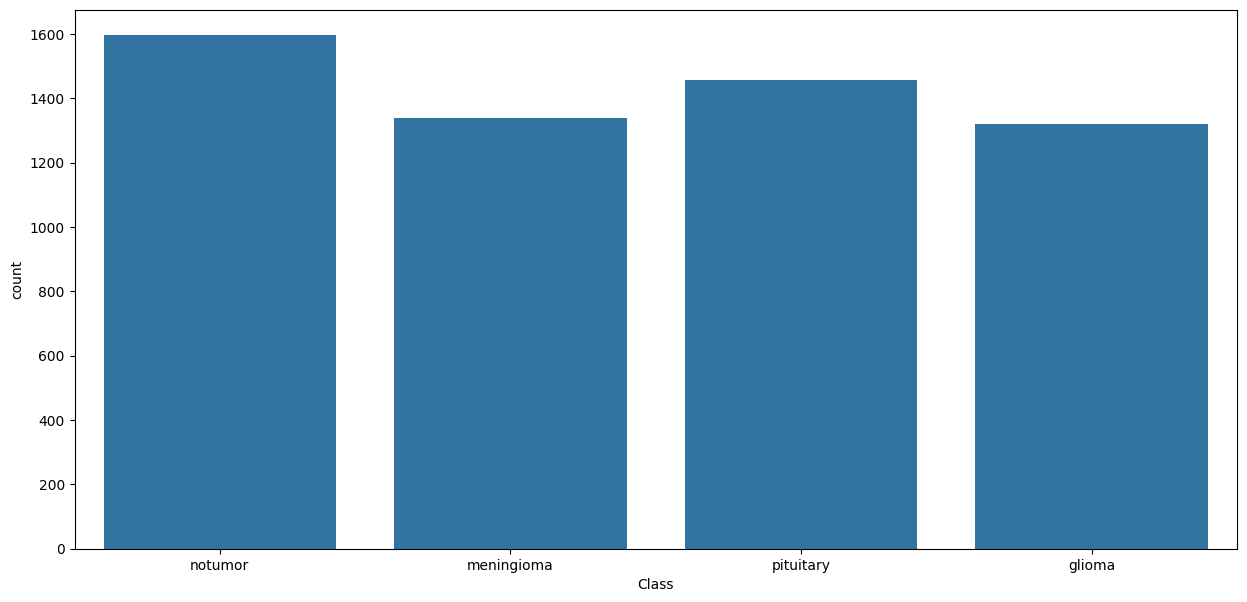

In [8]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

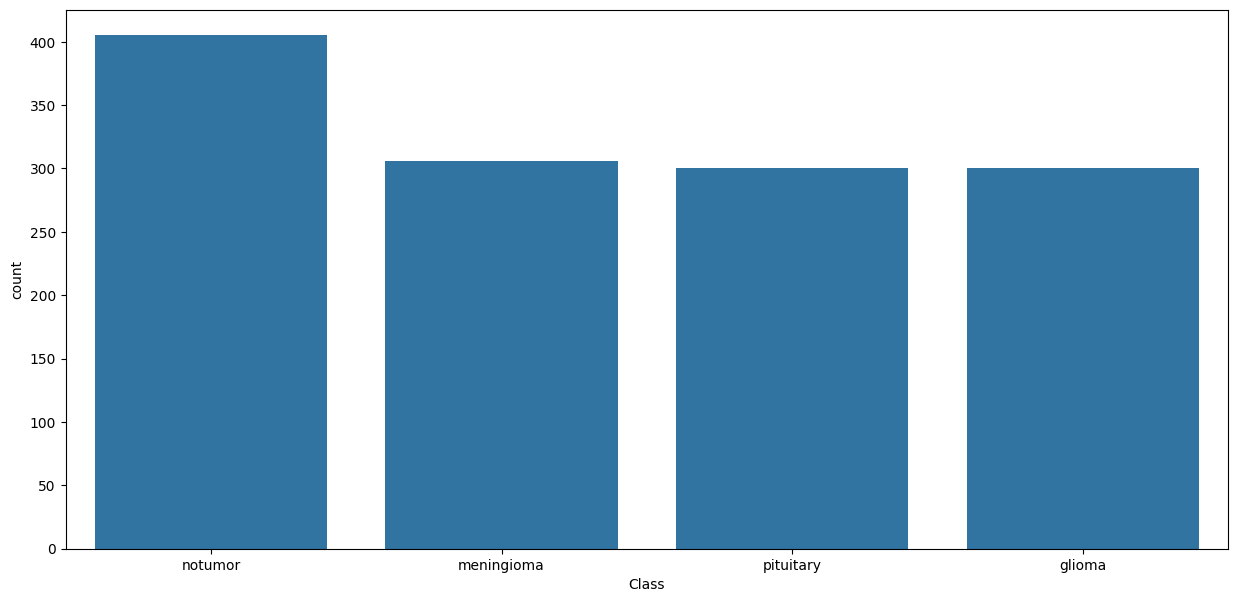

In [9]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [12]:
valid_df

,Class,Class Path
611,meningioma,/content/Testing/meningioma/Te-me_0150.jpg
1029,glioma,/content/Testing/glioma/Te-gl_0282.jpg
483,meningioma,/content/Testing/meningioma/Te-me_0225.jpg
472,meningioma,/content/Testing/meningioma/Te-meTr_0004.jpg
1173,glioma,/content/Testing/glioma/Te-gl_0264.jpg
...,...,...
785,pituitary,/content/Testing/pituitary/Te-pi_0196.jpg
226,notumor,/content/Testing/notumor/Te-no_0393.jpg
496,meningioma,/content/Testing/meningioma/Te-me_0135.jpg
341,notumor,/content/Testing/notumor/Te-no_0264.jpg


In [13]:
ts_df

,Class,Class Path
651,meningioma,/content/Testing/meningioma/Te-me_0033.jpg
248,notumor,/content/Testing/notumor/Te-no_0043.jpg
451,meningioma,/content/Testing/meningioma/Te-me_0107.jpg
807,pituitary,/content/Testing/pituitary/Te-pi_0153.jpg
805,pituitary,/content/Testing/pituitary/Te-pi_0247.jpg
...,...,...
945,pituitary,/content/Testing/pituitary/Te-pi_0230.jpg
1058,glioma,/content/Testing/glioma/Te-gl_0066.jpg
782,pituitary,/content/Testing/pituitary/Te-pi_0012.jpg
120,notumor,/content/Testing/notumor/Te-no_0347.jpg


In [14]:
batch_size = 32
img_size = (299, 299)
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))
ts_generator = ImageDataGenerator(rescale=1/255)

In [15]:
tr_gen = image_generator.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size)

ts_gen = ts_generator.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


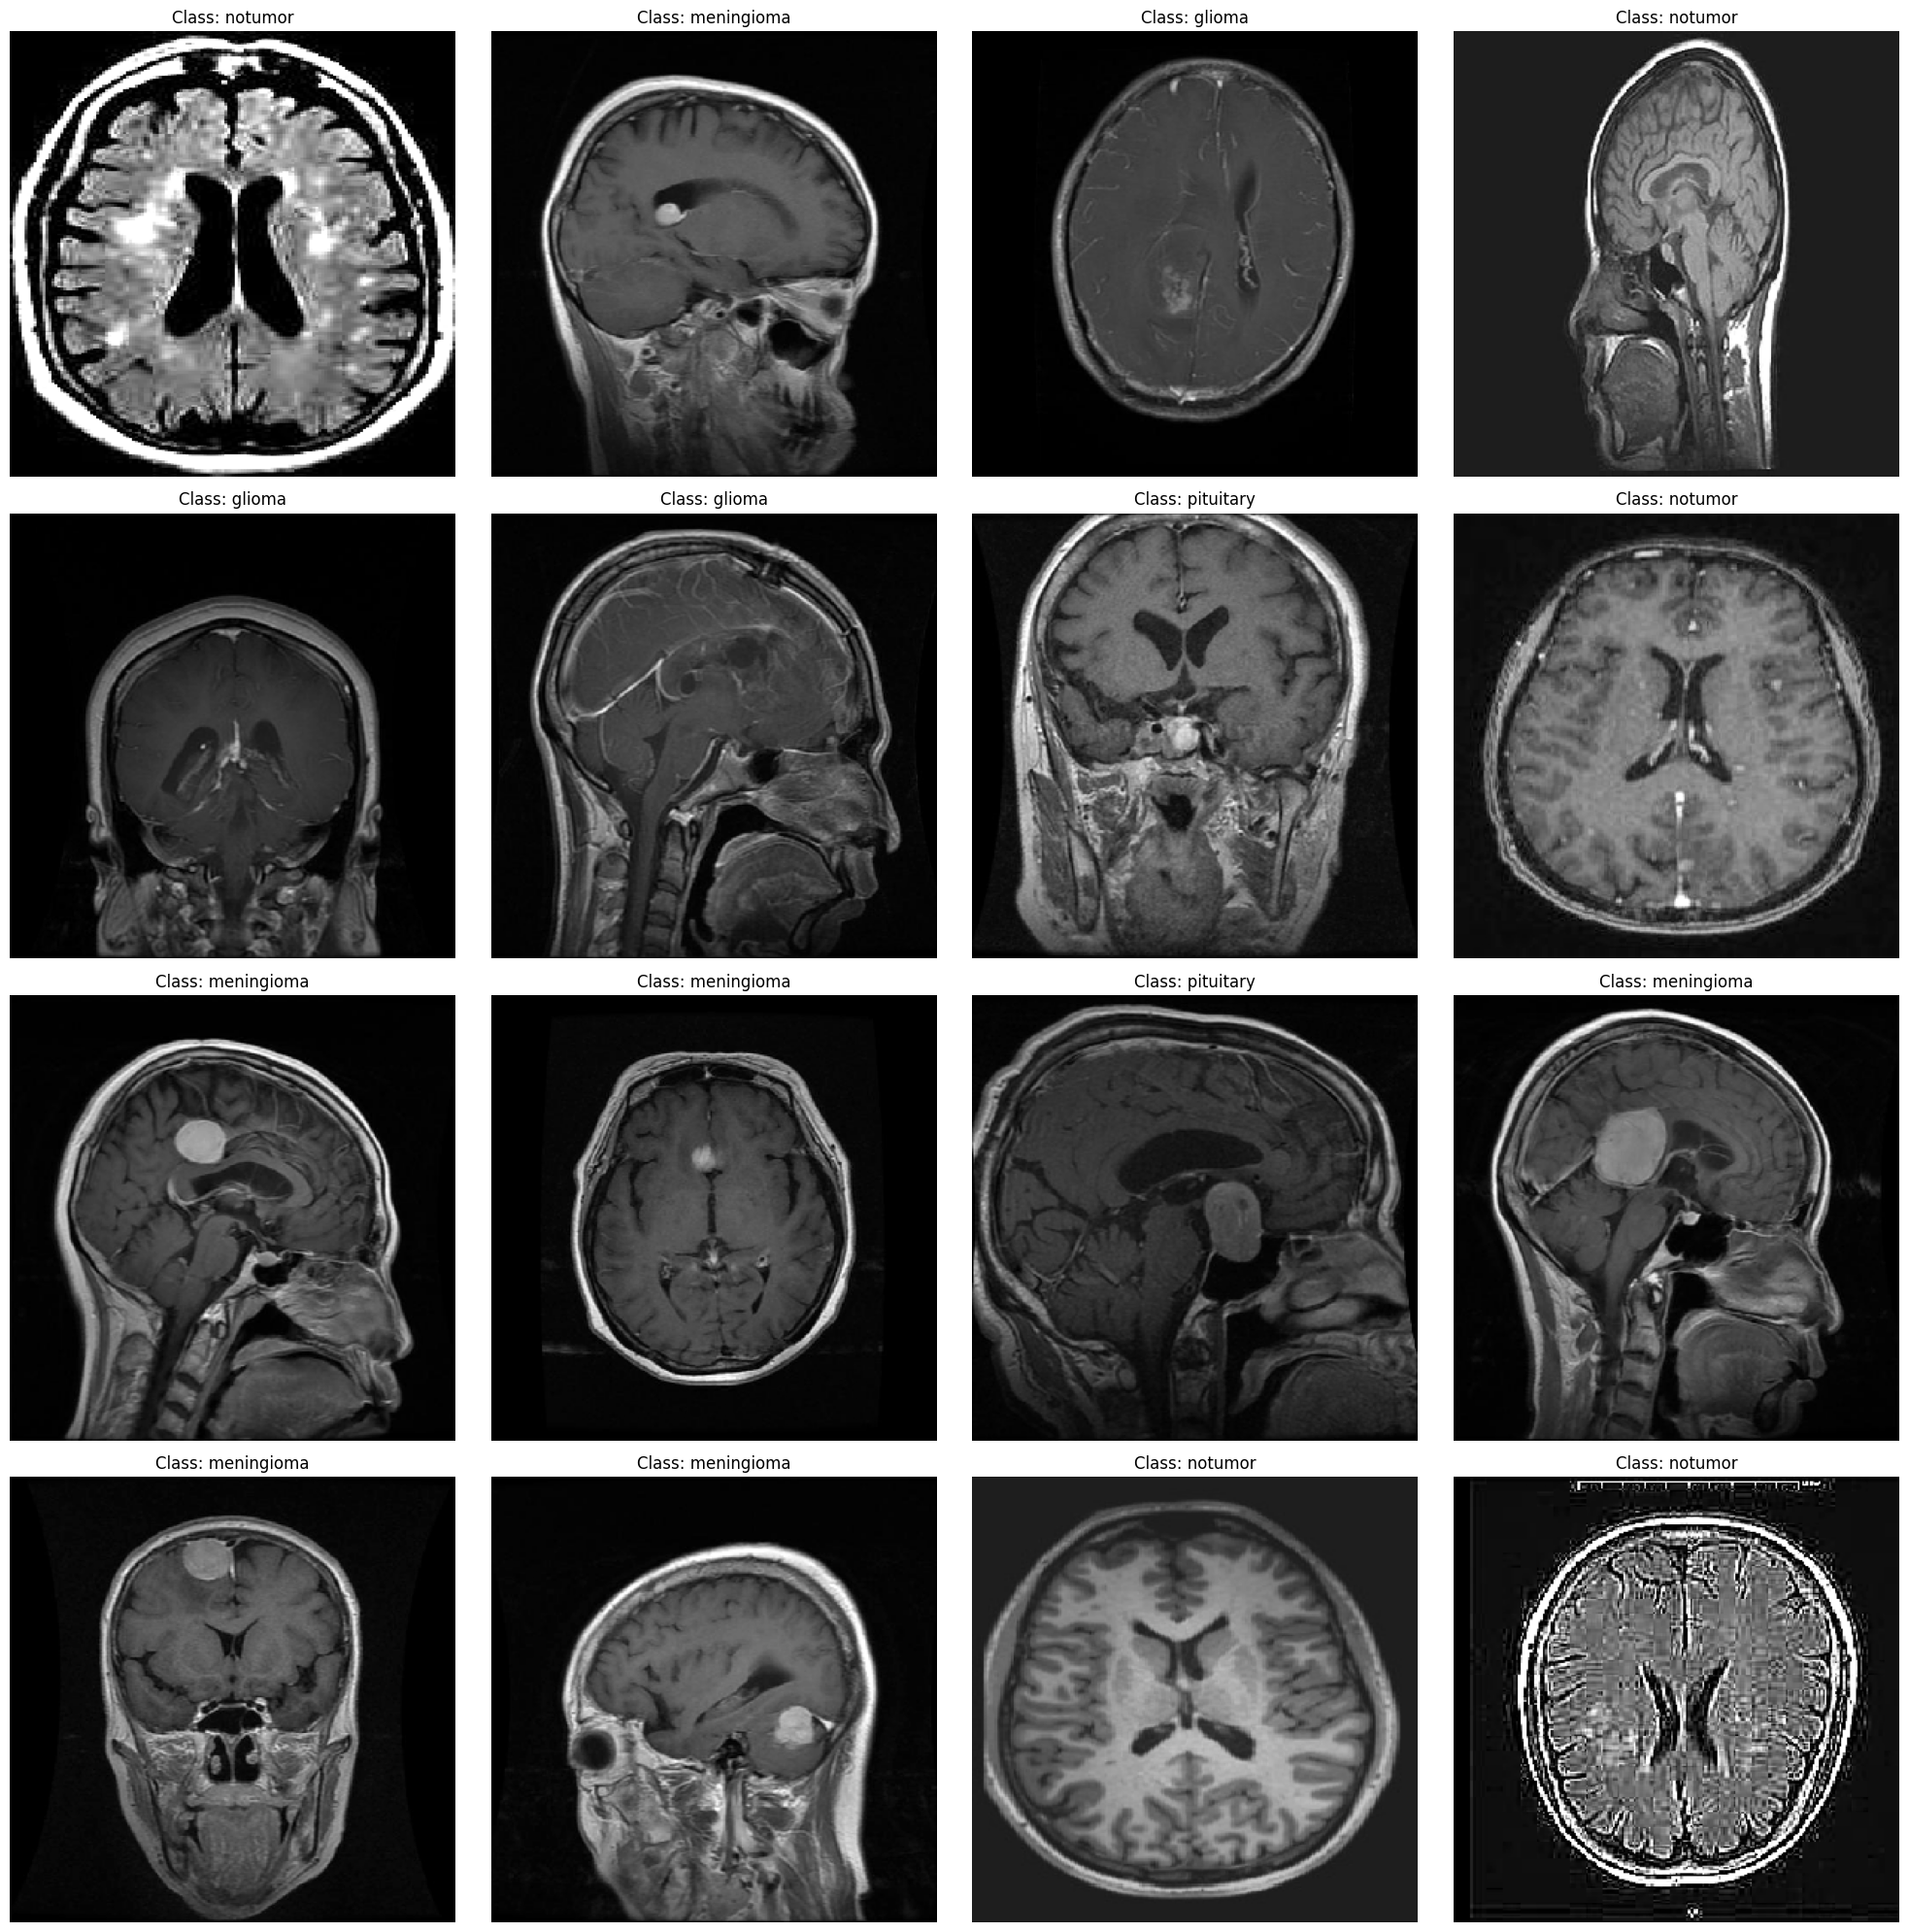

In [16]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index
  class_index = np.argmax(label)

  # Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [17]:
image_shape = (299,299,3)

base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=image_shape, pooling='max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',Precision(),Recall()])

In [25]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 161s 890ms/step - accuracy: 0.9972 - loss: 0.0116 - precision: 0.9977 - recall: 0.9972 - val_accuracy: 0.9710 - val_loss: 0.1319 - val_precision: 0.9725 - val_recall: 0.9710
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 889ms/step - accuracy: 0.9980 - loss: 0.0088 - precision: 0.9982 - recall: 0.9980 - val_accuracy: 0.9863 - val_loss: 0.0726 - val_precision: 0.9878 - val_recall: 0.9863
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 207s 917ms/step - accuracy: 0.9998 - loss: 0.0014 - precision: 0.9998 - recall: 0.9998 - val_accuracy: 0.9878 - val_loss: 0.0736 - val_precision: 0.9878 - val_recall: 0.9878
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 196s 886ms/step - accuracy: 0.9999 - loss: 8.1629e-04 - precision: 0.9999 - recall: 0.9999 - val_accuracy: 0.9740 - val_loss: 0.1740 - val_precision: 0.9740 - val_recall: 0.9740
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 159s 883ms/step - accuracy: 0.9968 - loss: 0.0125 - precision: 0.9970 - recall: 0.9967 - val_accuracy: 0.

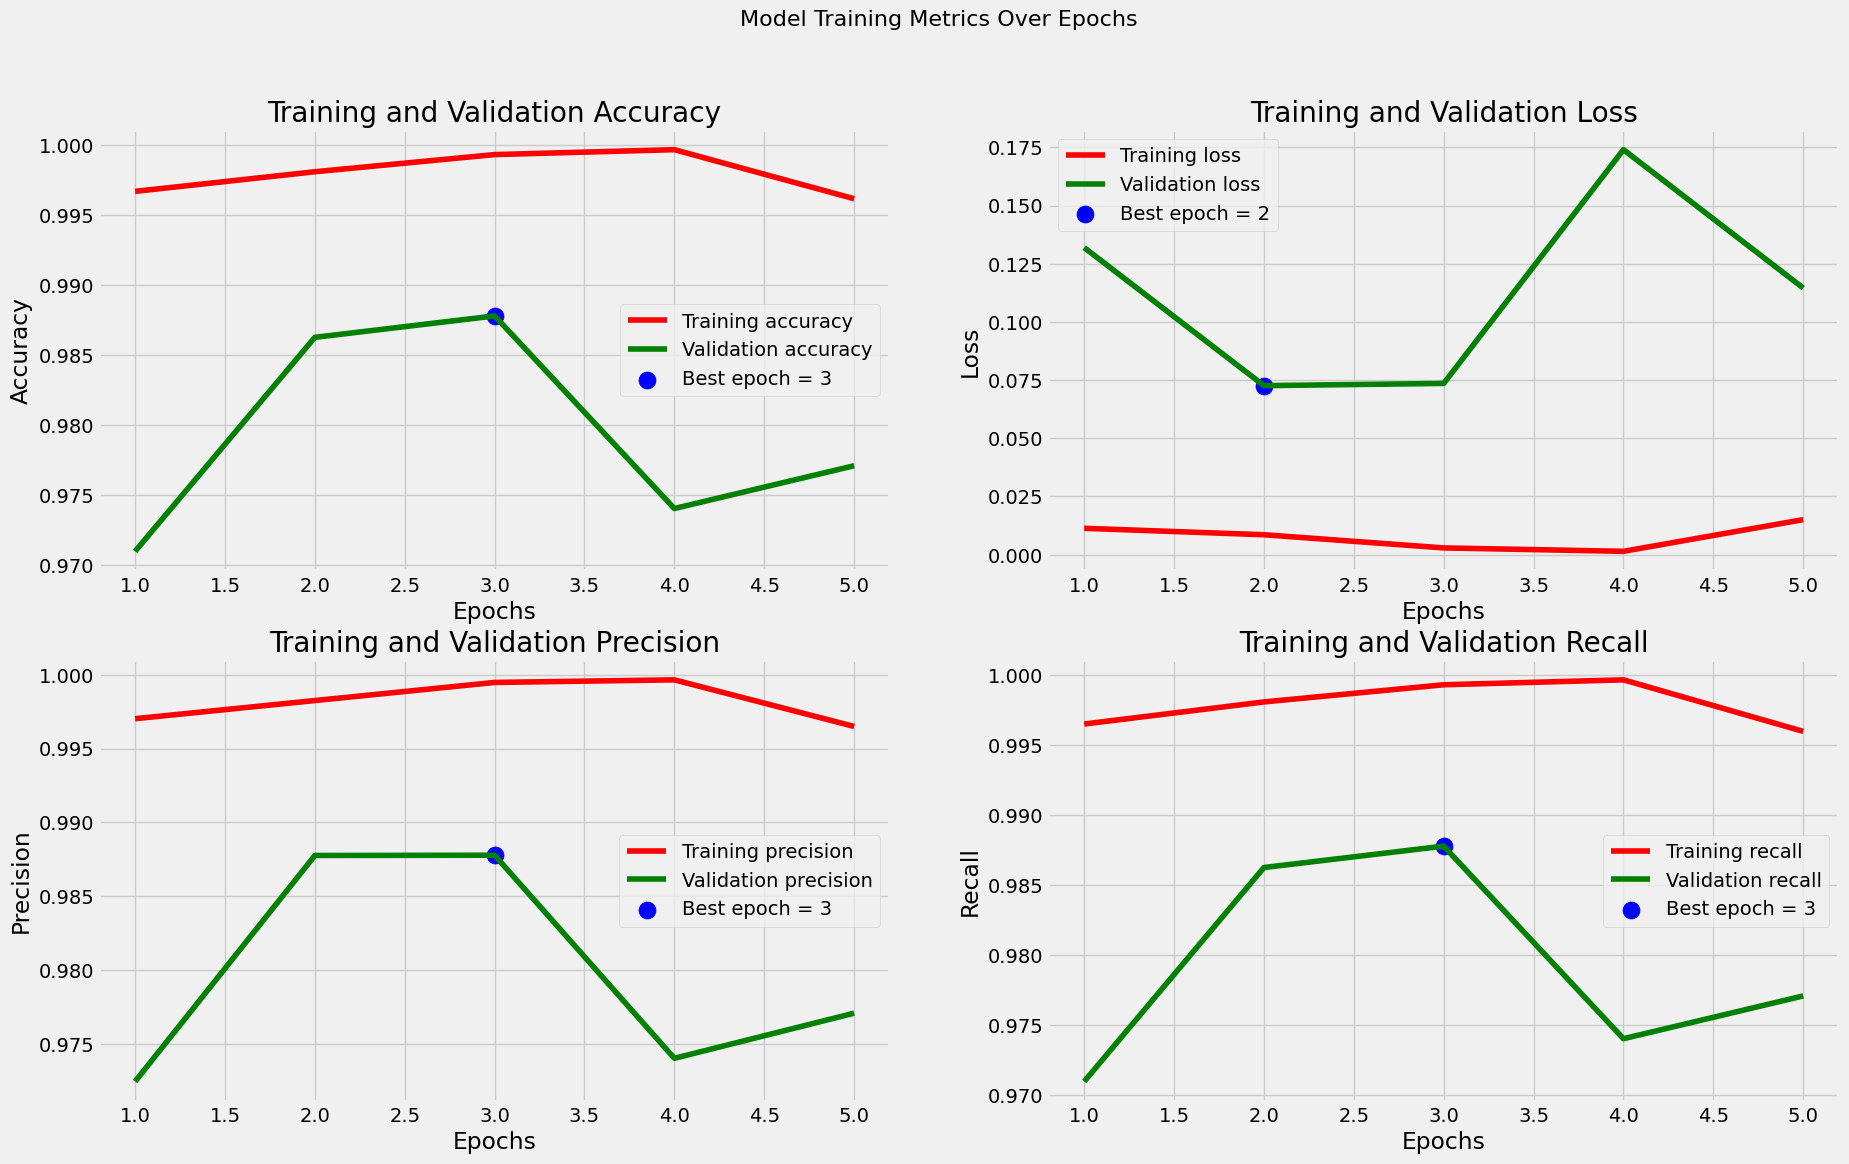

In [26]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in  metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#  Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2,2,i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [27]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f'Train Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}%')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f'Validation Loss: {valid_score[0]:.4f}%')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f'Test Loss: {test_score[0]:.4f}%')

179/179 ━━━━━━━━━━━━━━━━━━━━ 54s 302ms/step - accuracy: 0.9986 - loss: 0.0035 - precision: 0.9986 - recall: 0.9986
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 294ms/step - accuracy: 0.9780 - loss: 0.1305 - precision: 0.9780 - recall: 0.9780
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9944 - loss: 0.0179 - precision: 0.9944 - recall: 0.9944
Train Accuracy: 99.93%
Train Loss: 0.0017%


Validation Accuracy: 97.86%
Validation Loss: 0.1108%


Test Accuracy: 99.09%
Test Loss: 0.0318%


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step


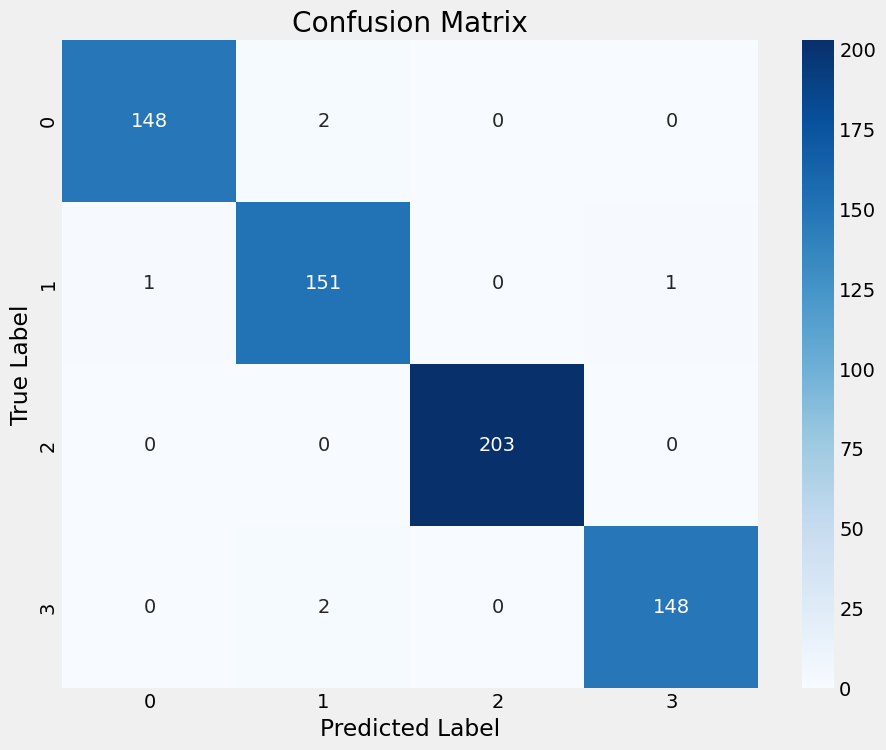

In [28]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary',
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from PIL import Image

def predict(img_path: str) -> None:
  # Get class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6,8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2,1,1)
  plt.imshow(resized_img)
  plt.title(f'Input MRI Image\nPredicted: {predicted_class}')

  # Plot prediction probabilities
  plt.subplot(2,1,2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel('Probability', fontsize=15)
  plt.title('Class Probabilities')

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f'\nPredicted tumor type: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


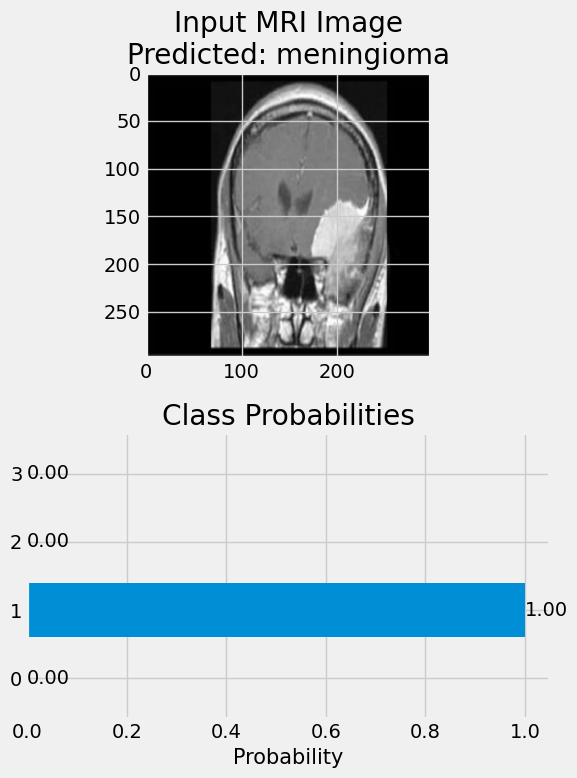


Predicted tumor type: meningioma


In [30]:
predict('/content/Testing/meningioma/Te-meTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


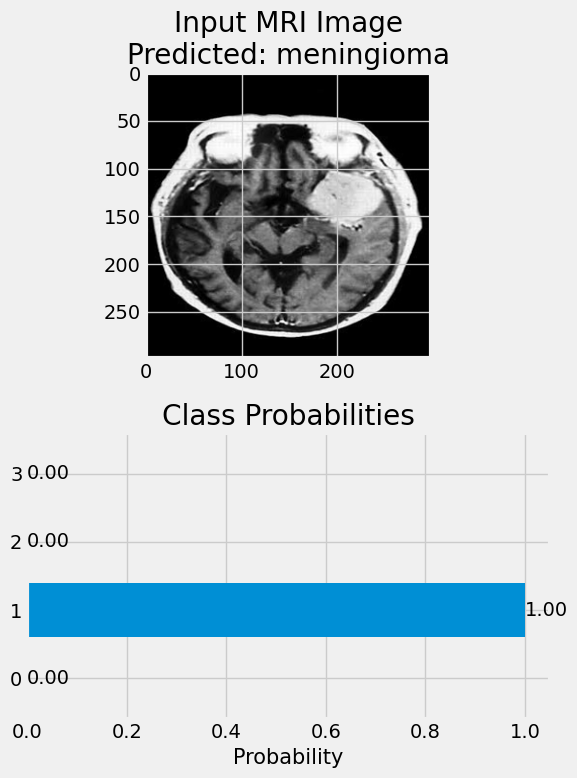


Predicted tumor type: meningioma


In [31]:
predict('/content/Testing/meningioma/Te-meTr_0005.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


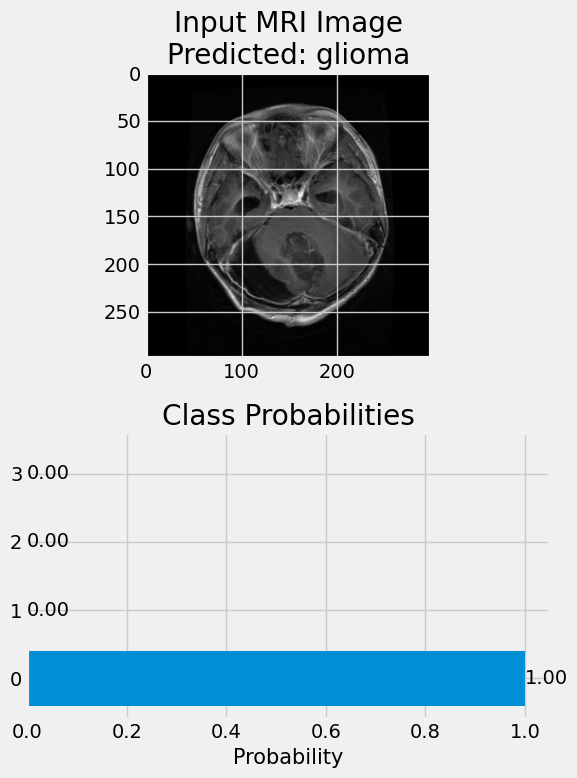


Predicted tumor type: glioma


In [32]:
predict('/content/Testing/glioma/Te-glTr_0000.jpg')

In [34]:
model.save_weights('xception_model.weights.h5')

In [35]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [36]:
batch_size = 16
img_size = (224, 224)
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))
ts_generator = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size)

ts_gen = ts_generator.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [37]:
# Create a Sequential model

cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3,3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 182s 422ms/step - accuracy: 0.5546 - loss: 2.2308 - precision_1: 0.6994 - recall_1: 0.3615 - val_accuracy: 0.7313 - val_loss: 0.8715 - val_precision_1: 0.7743 - val_recall_1: 0.6809
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 136s 316ms/step - accuracy: 0.8065 - loss: 0.7162 - precision_1: 0.8307 - recall_1: 0.7785 - val_accuracy: 0.8092 - val_loss: 0.5939 - val_precision_1: 0.8301 - val_recall_1: 0.7832
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 113s 314ms/step - accuracy: 0.8642 - loss: 0.5401 - precision_1: 0.8771 - recall_1: 0.8452 - val_accuracy: 0.8458 - val_loss: 0.5260 - val_precision_1: 0.8718 - val_recall_1: 0.8198
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 113s 314ms/step - accuracy: 0.8903 - loss: 0.4269 - precision_1: 0.8987 - recall_1: 0.8781 - val_accuracy: 0.8473 - val_loss: 0.5110 - val_precision_1: 0.8519 - val_recall_1: 0.8427
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 113s 315ms/step - accuracy: 0.9226 - loss: 0.3487 - precision_1: 0.9273 - recall_1: 0.9

In [43]:
history.history

{'accuracy': [0.6682422757148743,
  0.8160014152526855,
  0.8683473467826843,
  0.8912814855575562,
  0.924369752407074],
 'loss': [1.4143390655517578,
  0.6702868938446045,
  0.5096710324287415,
  0.4190714955329895,
  0.3369678258895874],
 'precision_1': [0.7603989243507385,
  0.8393155932426453,
  0.8805646300315857,
  0.8997318744659424,
  0.9299272894859314],
 'recall_1': [0.5472689270973206,
  0.7900910377502441,
  0.8518907427787781,
  0.881302535533905,
  0.9177170991897583],
 'val_accuracy': [0.7312977313995361,
  0.8091602921485901,
  0.8458015322685242,
  0.847328245639801,
  0.9206106662750244],
 'val_loss': [0.8714501857757568,
  0.5938608646392822,
  0.5260282158851624,
  0.5110162496566772,
  0.34905537962913513],
 'val_precision_1': [0.7743055820465088,
  0.8300970792770386,
  0.8717532753944397,
  0.8518518805503845,
  0.9246153831481934],
 'val_recall_1': [0.6809160113334656,
  0.7832061052322388,
  0.8198473453521729,
  0.8427481055259705,
  0.9175572395324707]}

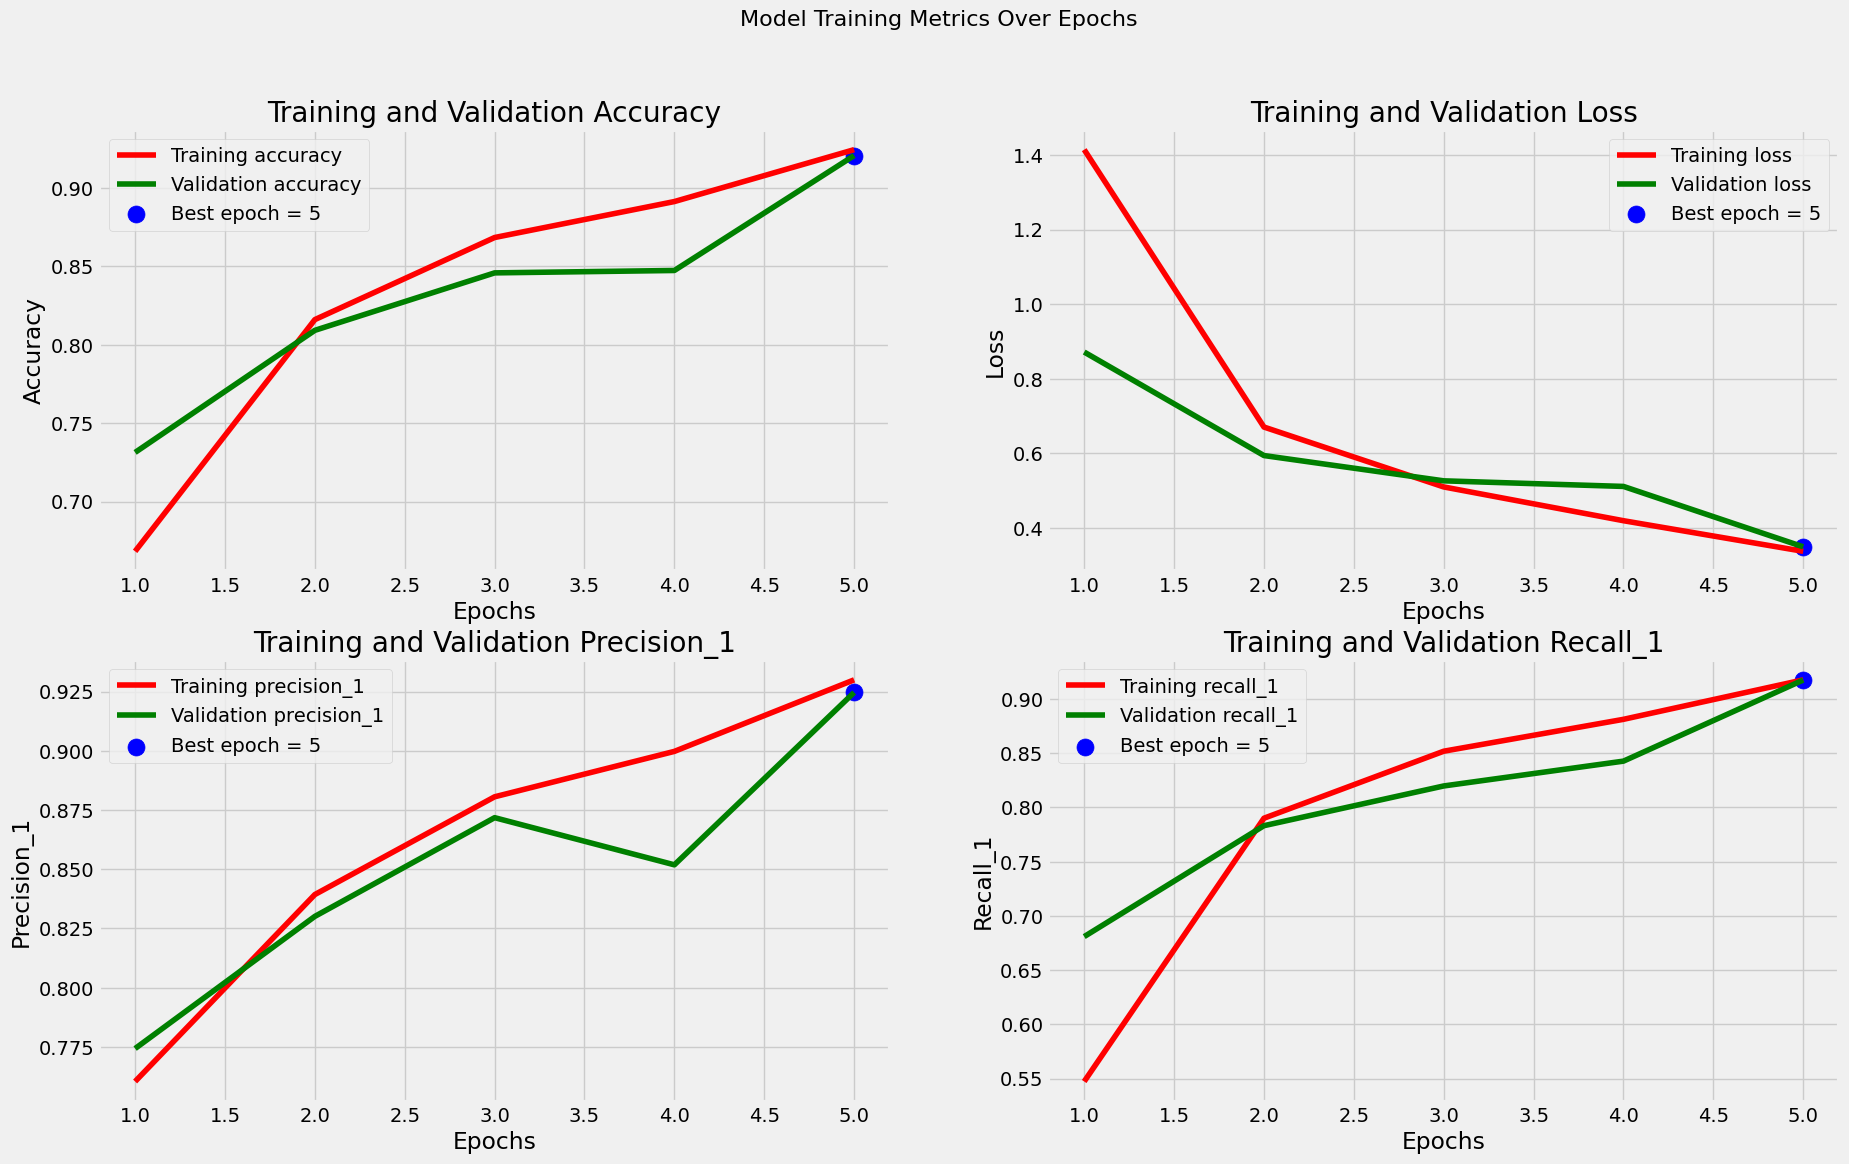

In [45]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']

tr_metrics = {m: history.history[m] for m in  metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#  Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2,2,i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [46]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f'Train Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}%')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f'Validation Loss: {valid_score[0]:.4f}%')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f'Test Loss: {test_score[0]:.4f}%')

357/357 ━━━━━━━━━━━━━━━━━━━━ 34s 96ms/step - accuracy: 0.9665 - loss: 0.2277 - precision_1: 0.9683 - recall_1: 0.9652
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9241 - loss: 0.3599 - precision_1: 0.9291 - recall_1: 0.9123
 2/41 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.7812 - loss: 0.4417 - precision_1: 0.7812 - recall_1: 0.7812 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8913 - loss: 0.3428 - precision_1: 0.8928 - recall_1: 0.8898
Train Accuracy: 96.24%
Train Loss: 0.2327%


Validation Accuracy: 93.13%
Validation Loss: 0.3463%


Test Accuracy: 91.16%
Test Loss: 0.3251%


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step


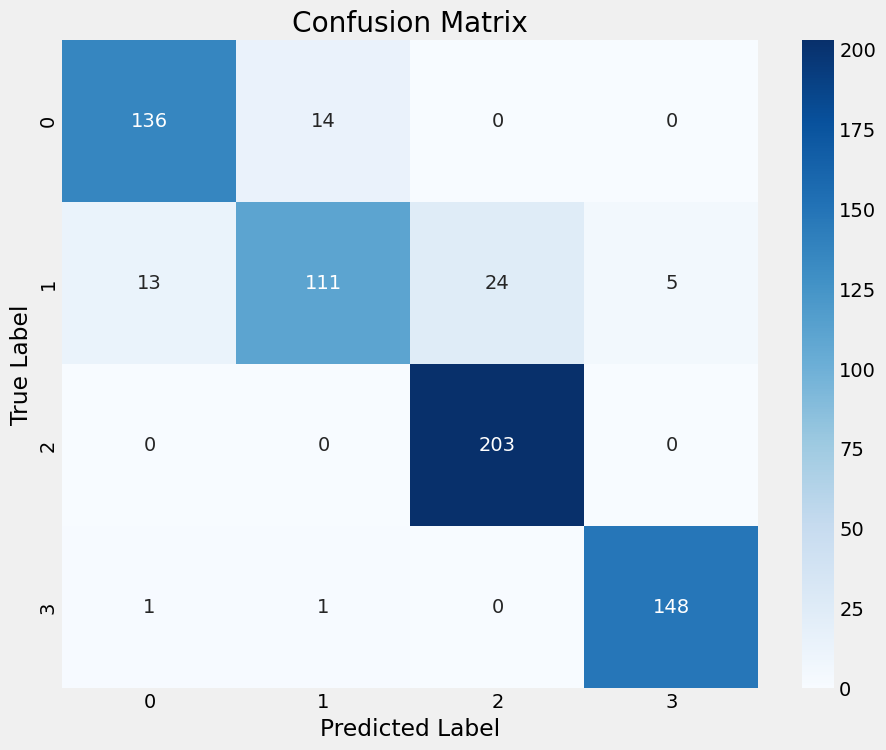

In [47]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary',
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# from sklearn.metrics import classification_report

In [50]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       150
           1       0.88      0.73      0.80       153
           2       0.89      1.00      0.94       203
           3       0.97      0.99      0.98       150

    accuracy                           0.91       656
   macro avg       0.91      0.90      0.91       656
weighted avg       0.91      0.91      0.91       656



In [51]:
cnn_model.save('cnn_model.h5')



```
## Part 2: Streamlit
```



In [52]:
! pip install streamlit python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [53]:
! npm install -g localtunnel


added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [54]:
from threading import Thread
from google.colab import userdata

In [55]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [56]:
%%writefile app.py

import streamlit as st

st.title('Brain Tumor Classification')

st.write('Upload an image of a brain MRI scan to classify.')

Writing app.py


In [57]:
thread = Thread(target=run_streamlit)
thread.start()

In [64]:
import os

# Get the tunnel password
password = os.popen("curl https://loca.lt/mytunnelpassword").read().strip()

print(f"Tunnel Password: {password}")

Tunnel Password: 34.125.76.157


In [65]:
!lt --port 8501

your url is: https://dark-cycles-argue.loca.lt
/tools/node/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:21603 (check your firewall settings)
    at Socket.<anonymous> (/tools/node/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:513:28)
    at emitErrorNT (node:internal/streams/destroy:157:8)
    at emitErrorCloseNT (node:internal/streams/destroy:122:3)
    at processTicksAndRejections (node:internal/process/task_queues:83:21)


In [63]:
print('Hello, world')

Hello, world
